In [100]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [101]:
data=pd.read_csv('weatherHistory.csv')
dataset=data

In [102]:
data.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [103]:
dataset=dataset.drop(['Formatted Date'], axis=1)

In [104]:
dataset.head(2)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [105]:
print(set(dataset['Summary'].unique()))

{'Light Rain', 'Drizzle', 'Humid and Overcast', 'Breezy and Overcast', 'Humid and Mostly Cloudy', 'Mostly Cloudy', 'Clear', 'Windy and Partly Cloudy', 'Windy and Dry', 'Breezy', 'Breezy and Mostly Cloudy', 'Breezy and Dry', 'Breezy and Foggy', 'Breezy and Partly Cloudy', 'Dry and Partly Cloudy', 'Overcast', 'Dry', 'Windy and Foggy', 'Windy and Mostly Cloudy', 'Dry and Mostly Cloudy', 'Foggy', 'Partly Cloudy', 'Dangerously Windy and Partly Cloudy', 'Windy', 'Humid and Partly Cloudy', 'Windy and Overcast', 'Rain'}


In [106]:
print(set(dataset['Precip Type'].unique()))

{nan, 'snow', 'rain'}


In [107]:
dataset.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [108]:
dataset=dataset.drop(['Precip Type','Daily Summary'], axis=1)

In [109]:
dataset.isnull().sum()

Summary                     0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [110]:
dataset.head()

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,Mostly Cloudy,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [111]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (10.0, 5.0)
# Mean X and Y
def regression_line(X,Y,name1,name2):
    mean_x = np.mean(X)

    mean_y = np.mean(Y)

    # Total number of values

    n = len(X)

    # Using the formula to calculate b1 and b2

    numer = 0

    denom = 0

    for i in range(n):

        numer += (X[i] - mean_x)*(Y[i] -mean_y)

        denom += (X[i] - mean_x) ** 2

    b1 = numer / denom

    b0 = mean_y - (b1 * mean_x)

    # Print coefficients

    print('Slope = ',b1)
    print('C = ',b0)

    # Plotting Values and Regression Line

    max_x = np.max(X) + 10
    min_x = np.min(X) - 10

    # Calculating Line values x and y 


    x = np.linspace (min_x, max_x, 100 ) 
    y = b0 + b1*x

    # Ploting Line

    # Ploting Scatter Points

    plt.plot(x, y, color='blue', label='Regression Line') 
    plt.scatter (X, Y, c='#ef5423', label='Scatter Plot')

    plt.xlabel(name1) 
    plt.ylabel(name2) 
    plt.legend()
    plt.show()

Slope =  -0.012939114669679756
C =  0.8892972609553168


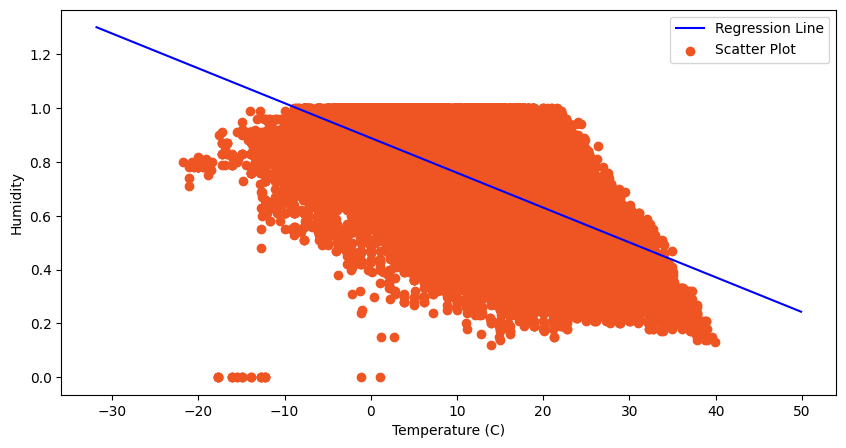

In [112]:
X = dataset['Temperature (C)'].values
Y = dataset['Humidity'].values
regression_line(X,Y,'Temperature (C)','Humidity')

Slope =  1.111652073053169
C =  -2.4099578479702366


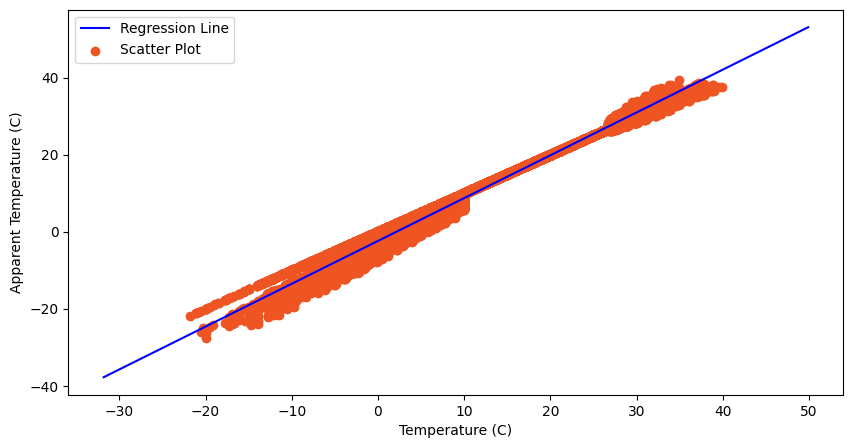

In [113]:
X = dataset['Temperature (C)'].values
Y = dataset['Apparent Temperature (C)'].values
regression_line(X,Y,'Temperature (C)','Apparent Temperature (C)')

Slope =  0.006483205401809787
C =  10.733278135489826


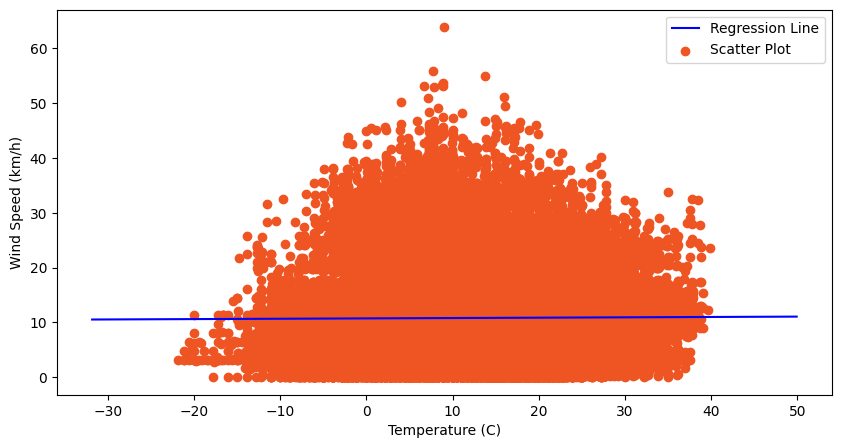

In [114]:
X = dataset['Temperature (C)'].values
Y = dataset['Wind Speed (km/h)'].values
regression_line(X,Y,'Temperature (C)','Wind Speed (km/h)')

Slope =  -0.06670621399372426
C =  1004.0319396555178


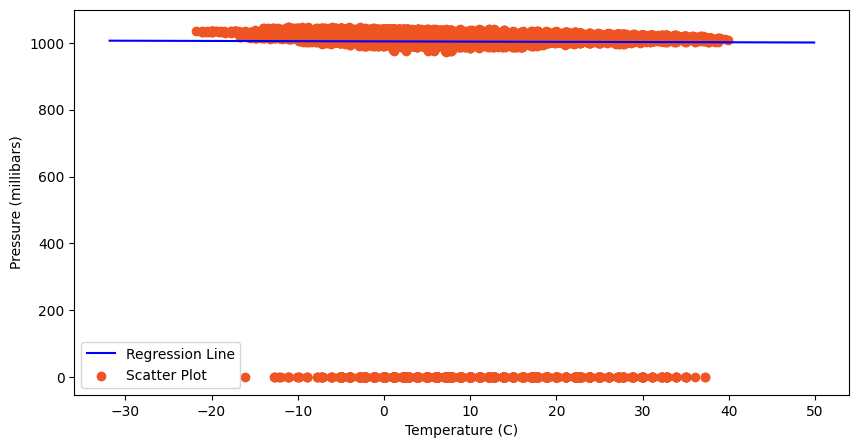

In [115]:
X = dataset['Temperature (C)'].values
Y = dataset['Pressure (millibars)'].values
regression_line(X,Y,'Temperature (C)','Pressure (millibars)')

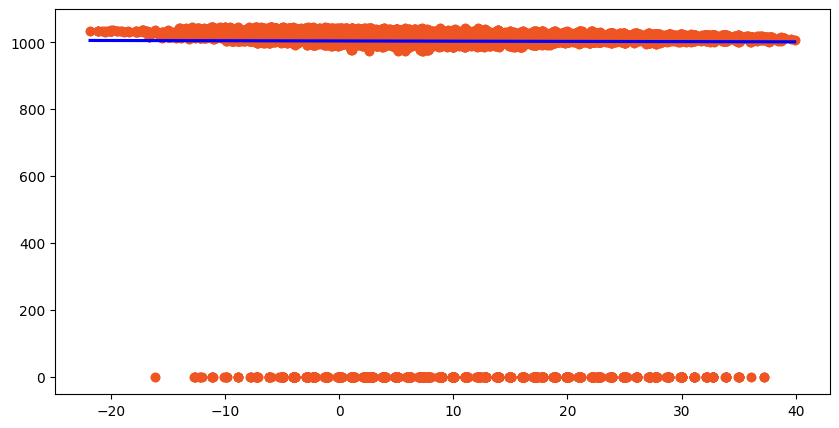

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate some random data
x = dataset['Temperature (C)'].values
y = dataset['Pressure (millibars)'].values

# Create scatter plot using Matplotlib
plt.scatter(x, y, color='#ef5423')

# Add regression line with red color using Seaborn
sns.regplot(x=x, y=y, color='blue', scatter_kws={'color': '#ef5423'})

# Show the plot
plt.show()


<Axes: xlabel='Temperature (C)'>

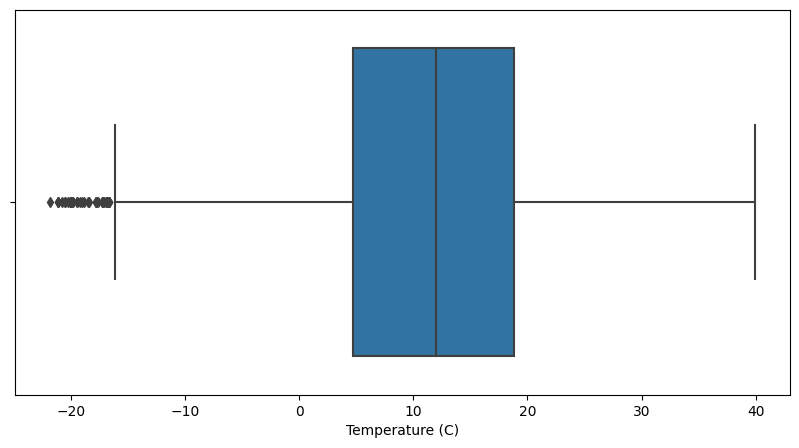

In [117]:
sns.boxplot(x="Temperature (C)" , data=dataset)

In [118]:
print(len(set(dataset['Summary'].unique())))

27


<Axes: xlabel='Temperature (C)', ylabel='Summary'>

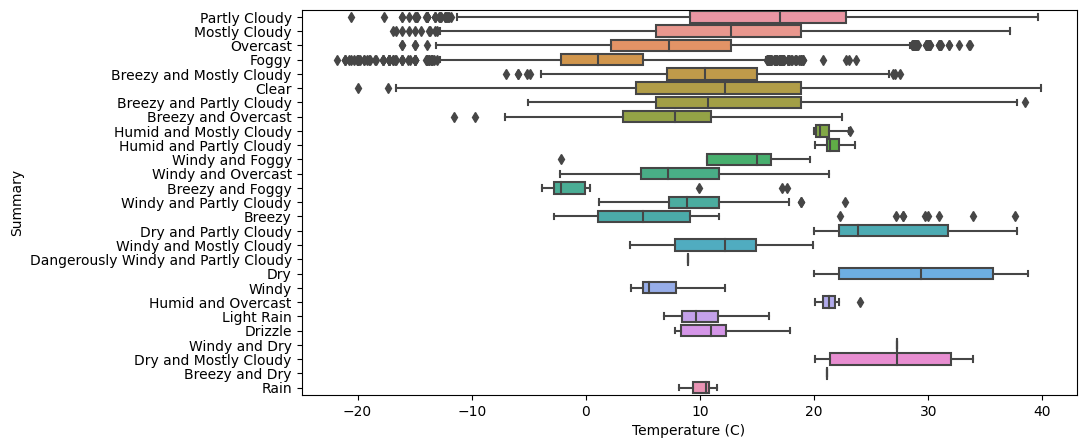

In [119]:
sns.boxplot(x="Temperature (C)" ,y='Summary', data=dataset)

<Axes: xlabel='Humidity', ylabel='Summary'>

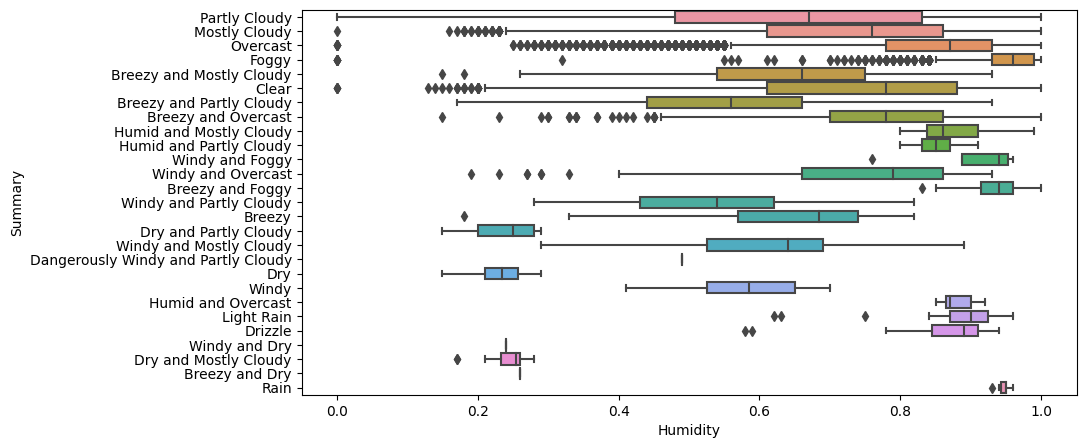

In [127]:
sns.boxplot(x='Humidity',y='Summary' ,data=dataset)

<Axes: xlabel='Wind Speed (km/h)'>

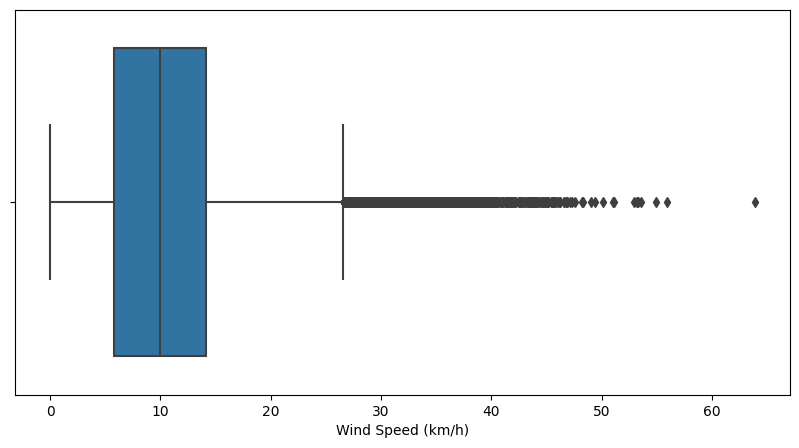

In [120]:

sns.boxplot(x='Wind Speed (km/h)' , data=dataset)

<Axes: xlabel='Humidity'>

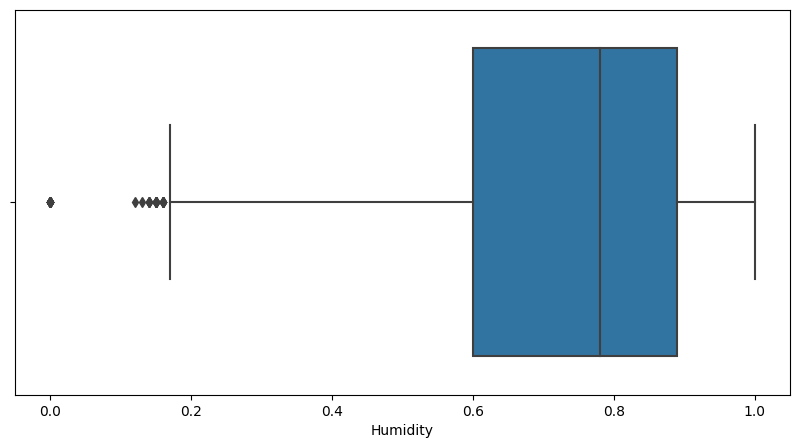

In [121]:

sns.boxplot(x='Humidity' , data=dataset)

In [122]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.neighbors import KNeighborsClassifier

X = dataset.drop(['Summary'], axis=1)
y = dataset['Summary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1 , random_state=1)



# use KNN algo

In [123]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100 , '%')

Accuracy: 47.750362844702465 %


# Decission _tree

In [ ]:
dt = DecisionTreeClassifier()
# Train the classifier on the training data
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100 , '%')

Accuracy: 49.865229110512125 %


In [128]:
cname = set(dataset['Summary'].unique())
cname=list(cname)
cname = [str(elem) for elem in cname]
# Visualize the decision tree
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns.values,  
                           class_names=cname,  
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data) 
graph.render("suv_data_tree")

# Show the decision tree
graph